In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [2]:
df = X.copy()
df['cnt'] = y.cnt

In [3]:
ts_df = df.groupby('dteday')['cnt'].sum()
ts_df = ts_df.to_frame(name='count_rentals')
ts_df = ts_df.reset_index().rename(columns={'dteday': 'Date'})

In [4]:
ts_df['Date'] = pd.to_datetime(ts_df['Date'])
ts_df['Year'] = ts_df['Date'].dt.year
ts_df['Month'] = ts_df['Date'].dt.month
monthly_rentals = ts_df.groupby(['Year', 'Month']).sum()['count_rentals']

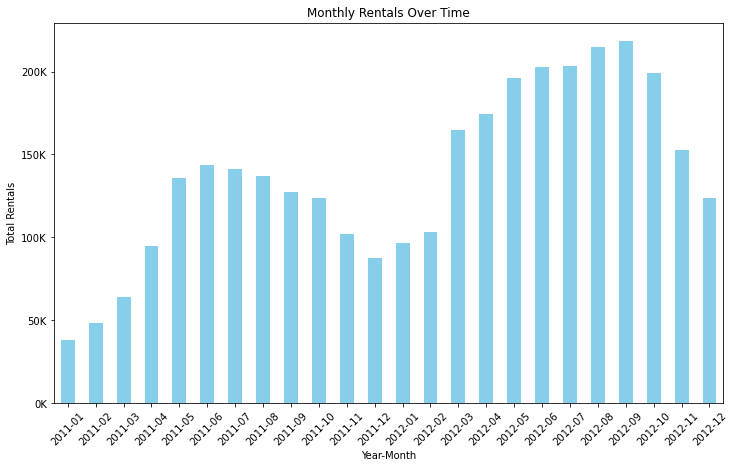

In [5]:
plt.figure(figsize=(12, 7))
monthly_rentals.plot(kind='bar', color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Total Rentals')
plt.title('Monthly Rentals Over Time')
plt.xticks(rotation=45)  

def format_y(value, pos):
    return f'{value * 1e-3:.0f}K'  # Convert to thousands

plt.gca().set_xticklabels([f'{year}-{month:02d}' for (year, month) in monthly_rentals.index], rotation=45)

from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y))
plt.show()

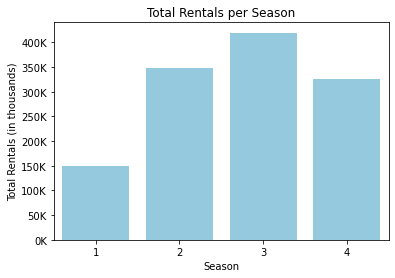

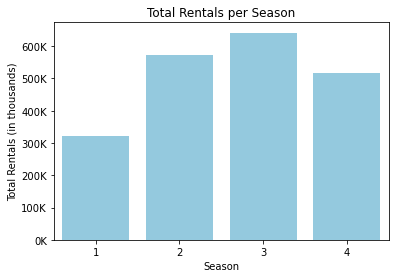

In [6]:
import seaborn as sns

def thousands(x, pos):
    return '%1.0fK' % (x * 1e-3)

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df[df['yr'] == 0], x='season', y='cnt', estimator=sum, ci=None, color='skyblue')  # Single color
ax.yaxis.set_major_formatter(FuncFormatter(thousands))  # Format y-axis in thousands
plt.title('Total Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals (in thousands)')
plt.show()

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df[df['yr'] == 1], x='season', y='cnt', estimator=sum, ci=None, color='skyblue')  # Single color
ax.yaxis.set_major_formatter(FuncFormatter(thousands))  # Format y-axis in thousands
plt.title('Total Rentals per Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals (in thousands)')
plt.show()

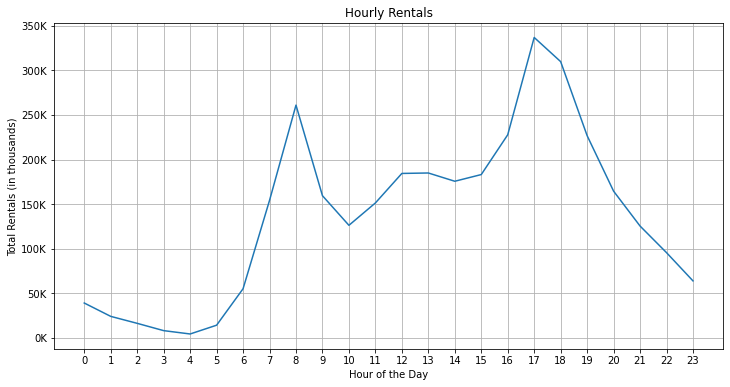

In [7]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df, x='hr', y='cnt', estimator=sum, ci=None)
ax.set_xticks(range(0, 24))  # Ensure all hours are shown
ax.yaxis.set_major_formatter(FuncFormatter(thousands))  # Format y-axis in thousands
plt.title('Hourly Rentals')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals (in thousands)')
plt.grid(True)  
plt.show()

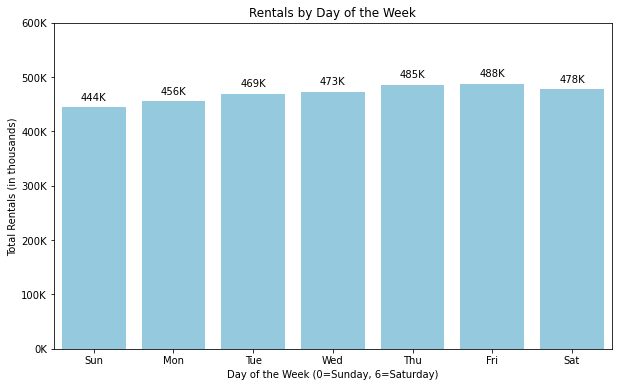

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='weekday', y='cnt', estimator=sum, ci=None, color='skyblue')  # Uniform color
ax.yaxis.set_major_formatter(FuncFormatter(thousands))  # Format y-axis in thousands
ax.set_ylim(0, 600000)

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 1e-3:.0f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Rentals by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Total Rentals (in thousands)')
plt.xticks(ticks=range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])  
plt.show()

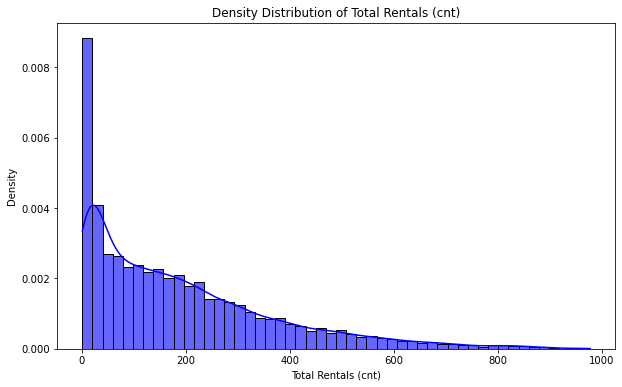

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cnt'], kde=True, bins=50, color='blue', stat='density', alpha=0.6)
plt.title('Density Distribution of Total Rentals (cnt)')
plt.xlabel('Total Rentals (cnt)')
plt.ylabel('Density')
plt.show()

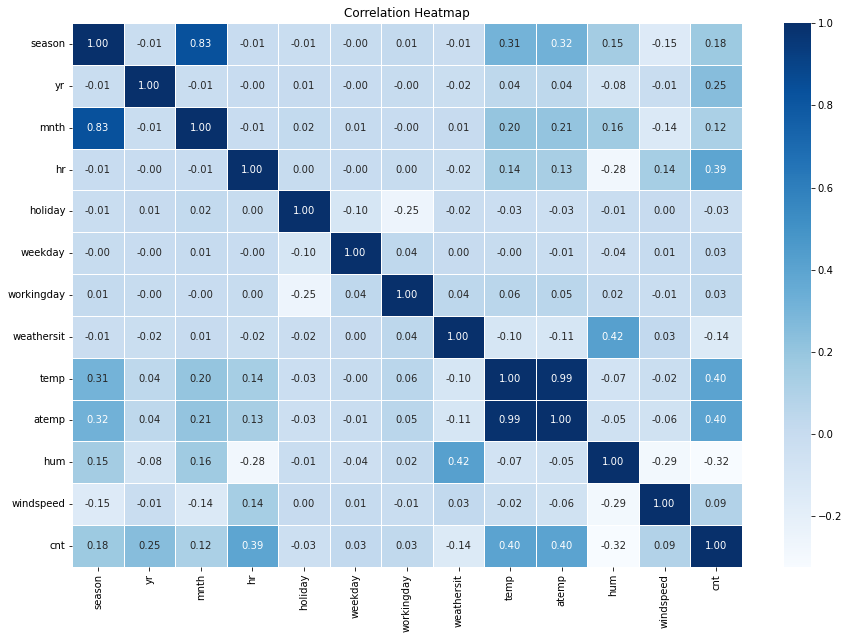

In [10]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [13]:
df['season'] = df['season'].astype('category')
df['hr'] = df['hr'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['holiday'] = df['holiday'].astype('category')

In [14]:
df.dtypes

dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [15]:
categorical_vars = ['hr', 'season', 'weathersit','yr','mnth','holiday','weekday','workingday']
df_with_dummies = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [16]:
df_with_dummies.columns

Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'season_2', 'season_3',
       'season_4', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1'],
      dtype='object')

In [17]:
hr_columns = [col for col in df_with_dummies.columns if col.startswith('hr_')]
season_columns = [col for col in df_with_dummies.columns if col.startswith('season_')]
weathersit_columns = [col for col in df_with_dummies.columns if col.startswith('weathersit_')]
continuous_vars = ['atemp', 'hum', 'windspeed']

feature_columns = hr_columns + season_columns + weathersit_columns + continuous_vars

X = df_with_dummies[feature_columns]
y = df_with_dummies['cnt']

In [18]:
import statsmodels.api as sm

X = df_with_dummies[feature_columns]
y = df_with_dummies['cnt']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     904.5
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:02:23   Log-Likelihood:            -1.0651e+05
No. Observations:               17379   AIC:                         2.131e+05
Df Residuals:                   17346   BIC:                         2.133e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -28.0513      6.403     -4.381   

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12304.623356999144
R-squared: 0.6246527800621173


In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12445.481765968385
R-squared: 0.6270358040495865


In [22]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)

# Predict on test data using Lasso
y_test_pred_lasso = lasso.predict(X_test)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
print(f"Testing Mean Squared Error: {test_mse_lasso}")
print(f"Testing R-squared: {test_r2_lasso}")

Testing Mean Squared Error: 13388.005666470362
Testing R-squared: 0.598790399385863


In [23]:
ridge = Ridge(alpha=0.5)  # alpha is the regularization strength
ridge.fit(X_train, y_train)

# Predict on test data using Ridge
y_test_pred_ridge = ridge.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
print(f"Testing Mean Squared Error: {test_mse_ridge}")
print(f"Testing R-squared: {test_r2_ridge}")

Testing Mean Squared Error: 12445.733631872477
Testing R-squared: 0.6270282561726803


In [24]:
hr_columns = [col for col in df_with_dummies.columns if col.startswith('hr_')]
season_columns = [col for col in df_with_dummies.columns if col.startswith('season_')]
weathersit_columns = [col for col in df_with_dummies.columns if col.startswith('weathersit_')]
mnth_columns = [col for col in df_with_dummies.columns if col.startswith('mnth_')]
yr_columns = [col for col in df_with_dummies.columns if col.startswith('yr_')]
continuous_vars = ['atemp', 'hum', 'windspeed']

feature_columns = hr_columns + season_columns + weathersit_columns + mnth_columns + yr_columns + continuous_vars

X = df_with_dummies[feature_columns]
y = df_with_dummies['cnt']

In [25]:
X = df_with_dummies[feature_columns]
y = df_with_dummies['cnt']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     855.0
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:02:23   Log-Likelihood:            -1.0501e+05
No. Observations:               17379   AIC:                         2.101e+05
Df Residuals:                   17334   BIC:                         2.105e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -74.0502      6.379    -11.609   

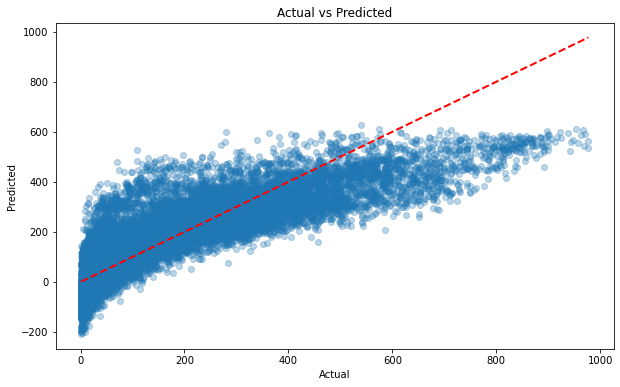

In [26]:
y_pred = model.predict(X)

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

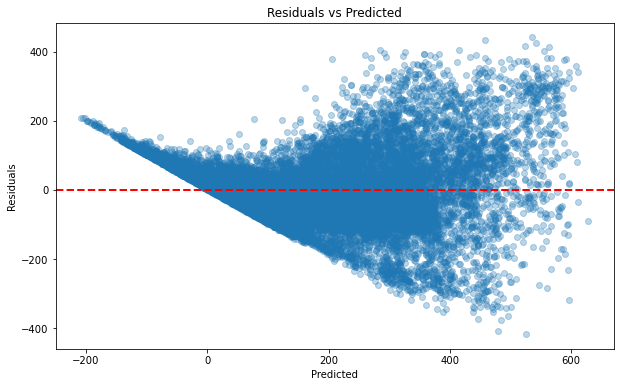

In [27]:
# Residuals plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

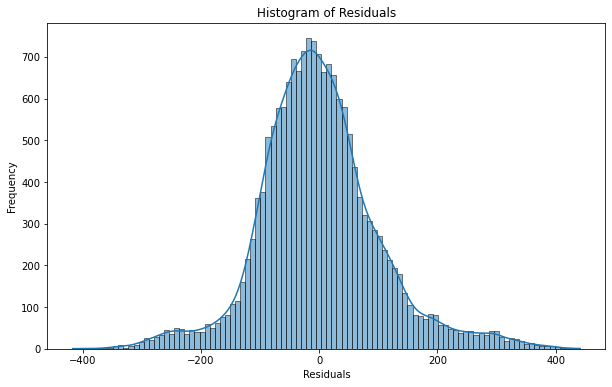

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [29]:
# from sklearn.linear_model import SGDRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# sgd_regressor = SGDRegressor(penalty=None, max_iter=1000, tol=1e-3, random_state=0)
# sgd_regressor.fit(X_train, y_train)

In [30]:
# y_test_pred_sgd = sgd_regressor.predict(X_test)
# test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)
# test_r2_sgd = r2_score(y_test, y_test_pred_sgd)
# print("SGD Regression - Test Data:")
# print(f"Testing Mean Squared Error: {test_mse_sgd}")
# print(f"Testing R-squared: {test_r2_sgd}")

# feature_names = X.columns
# coefficients = sgd_regressor.coef_

# for feature, coef in zip(feature_names, coefficients):
#     print(f"{feature}: {coef}")

In [31]:
# hr_columns = [col for col in df_with_dummies.columns if col.startswith('hr_')]
# season_columns = [col for col in df_with_dummies.columns if col.startswith('season_')]
# weathersit_columns = [col for col in df_with_dummies.columns if col.startswith('weathersit_')]
# mnth_columns = [col for col in df_with_dummies.columns if col.startswith('mnth_')]
# yr_columns = [col for col in df_with_dummies.columns if col.startswith('yr_')]
# holiday_columns = [col for col in df_with_dummies.columns if col.startswith('holiday_')]
# continuous_vars = ['atemp', 'hum', 'windspeed']

# feature_columns = hr_columns + season_columns + weathersit_columns + mnth_columns + yr_columns + holiday_columns + continuous_vars

# X = df_with_dummies[feature_columns]
# y = df_with_dummies['cnt']

In [32]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [33]:
# y_pred = model.predict(X)
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [34]:
df.head(2)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


In [35]:
# X = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp','hum','windspeed']]
# y = df['cnt']

In [36]:
# from sklearn.tree import DecisionTreeRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# tree_regressor = DecisionTreeRegressor(random_state=0)
# tree_regressor.fit(X_train, y_train)

In [37]:
# # Predict on training data
# y_train_pred_tree = tree_regressor.predict(X_train)
# train_mse_tree = mean_squared_error(y_train, y_train_pred_tree)
# train_r2_tree = r2_score(y_train, y_train_pred_tree)
# print("Decision Tree Regression - Training Data:")
# print(f"Training Mean Squared Error: {train_mse_tree}")
# print(f"Training R-squared: {train_r2_tree}")

In [38]:
# # Predict on test data
# y_test_pred_tree = tree_regressor.predict(X_test)
# test_mse_tree = mean_squared_error(y_test, y_test_pred_tree)
# test_r2_tree = r2_score(y_test, y_test_pred_tree)
# print("Decision Tree Regression - Test Data:")
# print(f"Testing Mean Squared Error: {test_mse_tree}")
# print(f"Testing R-squared: {test_r2_tree}")

In [39]:
X = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
y = df['cnt']

In [40]:
X.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1


In [41]:
y.dtypes

dtype('int64')

In [42]:
# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
# Predict on train data
y_train_pred = tree_regressor.predict(X_train)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train Mean Squared Error: {train_mse}")
print(f"Train R-squared: {train_r2}")

Train Mean Squared Error: 855.939210961663
Train R-squared: 0.9742201931103326


In [44]:
# Predict on test data
y_test_pred = tree_regressor.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")

Test Mean Squared Error: 4195.993441535609
Test R-squared: 0.8674896909769583


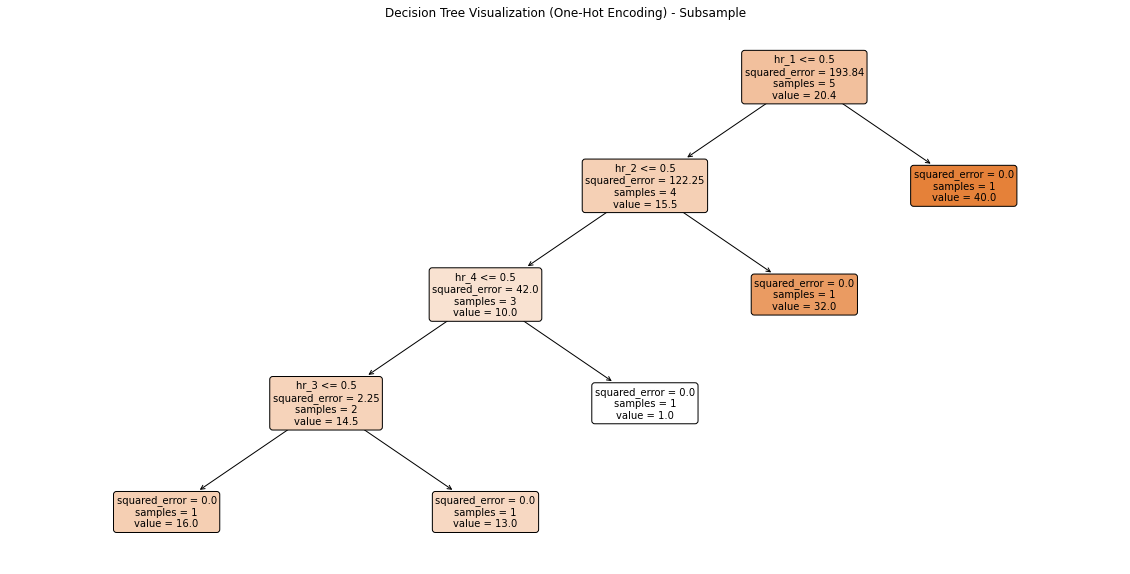

In [45]:
# Take a subsample for visualization
X_subsample = X_encoded.head(5)
y_subsample = y.head(5)

# Initialize and train the Decision Tree Regressor
tree_regressor_ss = DecisionTreeRegressor(random_state=42)
tree_regressor_ss.fit(X_subsample, y_subsample)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor_ss, feature_names=X_encoded.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (One-Hot Encoding) - Subsample")
plt.show()

In [46]:
y_train_pred_ss = tree_regressor.predict(X_subsample)

# Evaluate the model
train_mse_subsample = mean_squared_error(y_subsample, y_train_pred_ss)
train_r2_subsample = r2_score(y_subsample, y_train_pred_ss)
print(f"Train Mean Squared Error: {train_mse_subsample}")
print(f"Train R-squared: {train_r2_subsample}")

Train Mean Squared Error: 47.3625
Train R-squared: 0.755661886091622


In [47]:
# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the Decision Tree Regressor
# tree_regressor = DecisionTreeRegressor(random_state=42)
# tree_regressor.fit(X_train, y_train)

# # Predict on test data
# y_test_pred = tree_regressor.predict(X_test)

# # Evaluate the model
# test_mse = mean_squared_error(y_test, y_test_pred)
# test_r2 = r2_score(y_test, y_test_pred)
# print(f"Test Mean Squared Error (Label Encoding): {test_mse}")
# print(f"Test R-squared (Label Encoding): {test_r2}")

In [48]:
# # Take a subsample for visualization
# X_subsample = X.head(5)
# y_subsample = y.head(5)

# # Initialize and train the Decision Tree Regressor
# tree_regressor_ss = DecisionTreeRegressor(random_state=42)
# tree_regressor_ss.fit(X_subsample, y_subsample)

# # Plot the decision tree
# plt.figure(figsize=(20, 10))
# plot_tree(tree_regressor_ss, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree Visualization (label Encoding) - Subsample")
# plt.show()

In [49]:
X = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit','atemp','hum','windspeed']]
y = df['cnt']

In [50]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [51]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predict on test data
y_test_pred = tree_regressor.predict(X_test)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test Mean Squared Error (One-Hot Encoding): {test_mse}")
print(f"Test R-squared (One-Hot Encoding): {test_r2}")

Test Mean Squared Error (One-Hot Encoding): 5424.921029919447
Test R-squared (One-Hot Encoding): 0.8286799128463025


In [52]:
X1 = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
y = df['cnt']

In [53]:
from sklearn.ensemble import RandomForestRegressor

# One-hot encoding for categorical features
X1_encoded = pd.get_dummies(X1, drop_first=True)

# Split the data
X1_train, X1_test, y_train, y_test = train_test_split(X1_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
forest_regressor1 = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor1.fit(X1_train, y_train)

# Predict on test data
y1_test_pred = forest_regressor1.predict(X1_test)

# Evaluate the model
test_mse1 = mean_squared_error(y_test, y1_test_pred)
test_r2_1 = r2_score(y_test, y1_test_pred)
print(f"Test Mean Squared Error (Categorical Features Only): {test_mse1}")
print(f"Test R-squared (Categorical Features Only): {test_r2_1}")

Test Mean Squared Error (Categorical Features Only): 3131.7871187502287
Test R-squared (Categorical Features Only): 0.9010975387158616


In [54]:
# Define features and target for the second model
X2 = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed']]
y = df['cnt']

# One-hot encoding for categorical features
X2_encoded = pd.get_dummies(X2, drop_first=True)

# Split the data
X2_train, X2_test, y_train, y_test = train_test_split(X2_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
forest_regressor2 = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor2.fit(X2_train, y_train)

# Predict on test data
y2_test_pred = forest_regressor2.predict(X2_test)

# Evaluate the model
test_mse2 = mean_squared_error(y_test, y2_test_pred)
test_r2_2 = r2_score(y_test, y2_test_pred)
print(f"Test Mean Squared Error (Categorical and Continuous Features): {test_mse2}")
print(f"Test R-squared (Categorical and Continuous Features): {test_r2_2}")

Test Mean Squared Error (Categorical and Continuous Features): 2662.052264063171
Test R-squared (Categorical and Continuous Features): 0.9159318590313614


In [57]:
# Define the reduced parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto']
}

# Initialize the Random Forest Regressor
forest_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the reduced parameter grid and 2-fold cross-validation
grid_search = GridSearchCV(estimator=forest_regressor, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='r2')

# Fit GridSearchCV
grid_search.fit(X2_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best estimator
best_model = grid_search.best_estimator_

# Predict on test data
y_test_pred_best = best_model.predict(X2_test)

# Evaluate the tuned model
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)
print(f"Test Mean Squared Error (Tuned): {test_mse_best}")
print(f"Test R-squared (Tuned): {test_r2_best}")

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters: {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Mean Squared Error (Tuned): 2637.2372056843587
Test R-squared (Tuned): 0.9167155235198831
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  11.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total 